In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('recrutement_corail.xlsm', sheet_name='Data')

c:\miniconda\envs\Python_update\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.head()

,Clef,Date début,Site,Profondeur,Plaque,Famille,Position sur plaque,Nombre,Observation
0,36861Vaipahu61CassésDessous,2000-12-01,Vaipahu,6,1,Cassés,Dessous,4,NaN
1,44440Haapiti18164PocilloporidaeDessus,2021-09-01,Haapiti,18,164,Pocilloporidae,Dessus,2,NaN
2,44440Haapiti18164,2021-09-01,Haapiti,18,164,NaN,NaN,NaN,marques de perroquets
3,44440Haapiti18178AutresBords,2021-09-01,Haapiti,18,178,Autres,Bords,1,NaN
4,44440Haapiti18178PocilloporidaeDessous,2021-09-01,Haapiti,18,178,Pocilloporidae,Dessous,1,NaN


In [4]:
data['Date début'] = pd.to_datetime(data['Date début'], format='%Y%b')

In [5]:
data.drop(columns=['Clef', 'Profondeur', 'Plaque', 'Position sur plaque'], inplace=True)

In [6]:
data = data[data['Site'] == 'Tiahura']

In [7]:
data.drop(columns=['Site'], inplace=True)

In [8]:
data['Observation'].unique()

array(['absente', nan, 'cassée', 'PLAQUE CASSEE', 'PLAQUE MANQUANTE',
       'plaque absente', 'plaque cassée', 'plaque manquante',
       'Plaque absente'], dtype=object)

In [9]:
# drop rows where observation is not NaN
data = data[data['Observation'].isna()]

In [10]:
data.drop(columns=['Observation'], inplace=True)

In [11]:
data

,Date début,Famille,Nombre
51,2021-09-01,Pocilloporidae,1
52,2021-09-01,Pocilloporidae,2
53,2021-09-01,Acroporidae,2
54,2021-09-01,Pocilloporidae,3
55,2021-09-01,Pocilloporidae,1
...,...,...,...
8100,2017-12-01,Pocilloporidae,1
8102,2017-12-01,Acroporitidae,1
8103,2017-12-01,Cassés,1
8104,2017-12-01,Pocilloporidae,2


In [12]:
data = data.groupby(['Date début', 'Famille']).sum()

In [13]:
data

Nombre
Date début Famille              
2000-12-01 Acroporidae        14
           Autres              0
           Cassés             16
           Pocilloporidae    210
           Poritidae          65
...                          ...
2020-06-01 Pocilloporidae     58
2021-09-01 Acroporidae         6
           Autres              4
           Pocilloporidae     52
           Poritidae           4

[162 rows x 1 columns]

In [14]:
# pivot table
data = data.pivot_table(index='Date début', columns='Famille', values='Nombre')

In [15]:
data.drop(columns=['Acroporitidae'], inplace=True)

In [16]:
data.drop(columns=['Cassés'], inplace=True)
data.fillna(0, inplace=True)

In [17]:
data['Total'] = data.sum(axis=1)

In [18]:
data['Total'] = data['Total']

In [19]:
data_total = data['Total']
data.drop(columns=['Total'], inplace=True)

data = data.div(data.sum(axis=1), axis=0)

data['Total'] = data_total

data

Famille,Acroporidae,Autres,Pocilloporidae,Poritidae,Total
Date début,,,,,
2000-12-01,0.048443,0.000000,0.726644,0.224913,289.0
2001-09-01,0.612903,0.032258,0.064516,0.290323,31.0
2001-12-01,0.159091,0.015152,0.560606,0.265152,132.0
2002-09-01,0.038462,0.000000,0.269231,0.692308,26.0
2002-12-01,0.039370,0.015748,0.779528,0.165354,127.0
2003-09-01,0.388889,0.027778,0.388889,0.194444,36.0
2003-12-01,0.016129,0.026882,0.844086,0.112903,186.0
2004-09-01,0.272727,0.000000,0.272727,0.454545,11.0
2004-12-01,0.101695,0.016949,0.694915,0.186441,59.0


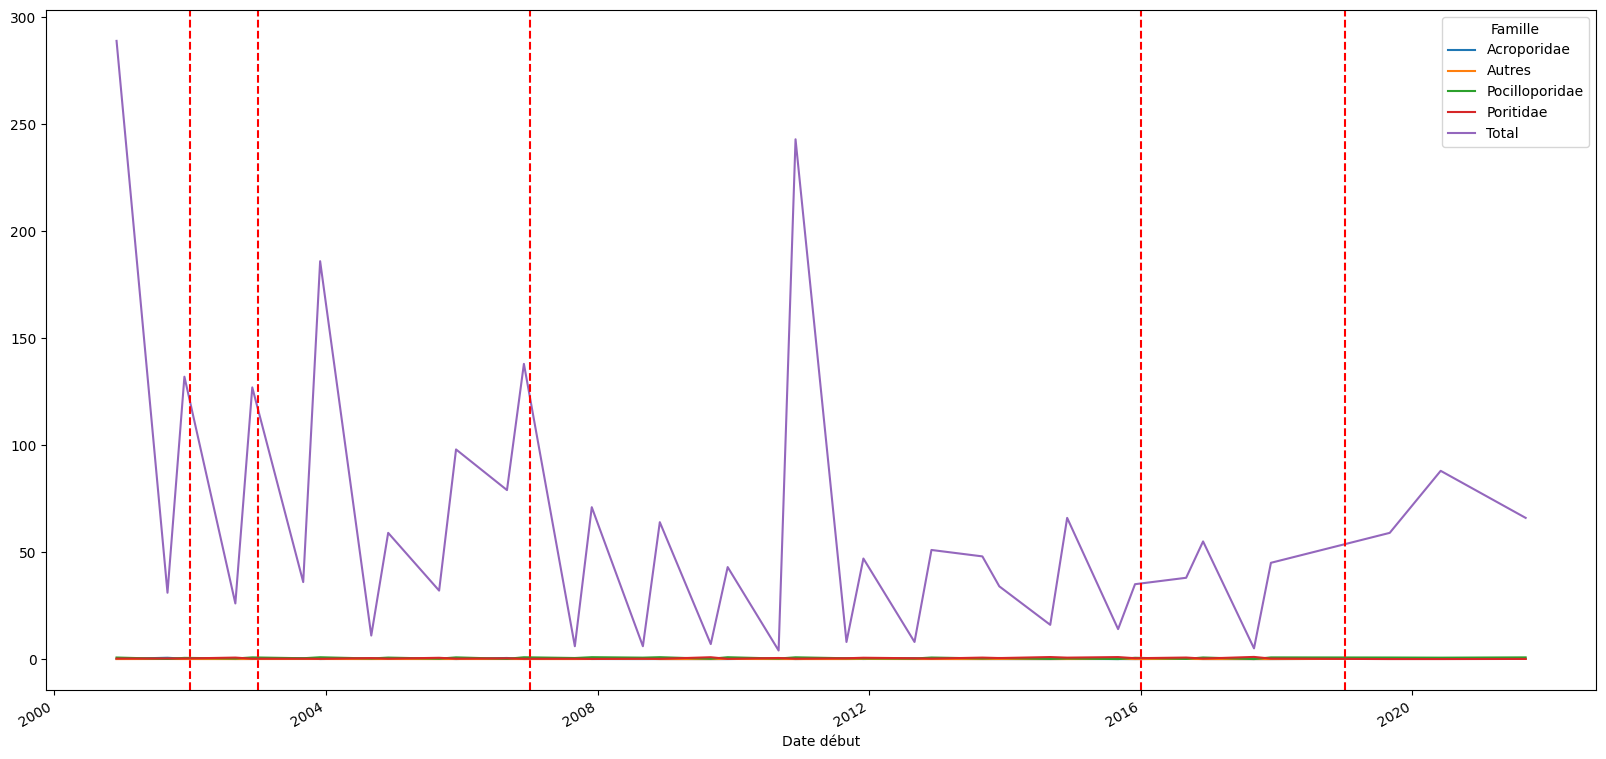

In [20]:
data.plot(figsize=(20,10))

# bleaching events list
list_bleaching = ['2002-01', '2003-01', '2007-01', '2016-01', '2019-01']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

In [22]:
data

Famille,Acroporidae,Autres,Pocilloporidae,Poritidae,Total
Date début,,,,,
2000-12-01,0.048443,0.000000,0.726644,0.224913,289.0
2001-09-01,0.612903,0.032258,0.064516,0.290323,31.0
2001-12-01,0.159091,0.015152,0.560606,0.265152,132.0
2002-09-01,0.038462,0.000000,0.269231,0.692308,26.0
2002-12-01,0.039370,0.015748,0.779528,0.165354,127.0
2003-09-01,0.388889,0.027778,0.388889,0.194444,36.0
2003-12-01,0.016129,0.026882,0.844086,0.112903,186.0
2004-09-01,0.272727,0.000000,0.272727,0.454545,11.0
2004-12-01,0.101695,0.016949,0.694915,0.186441,59.0


In [21]:
data.to_csv('recrutement_2000-2021_biannuel.csv')